## Analise exploratoria com dataset para predição de diabetes

In [87]:
! pip3 install pandas -q

! pip3 install seaborn -q

! pip3 install scikit-learn -q





In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn. neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [89]:
df = pd.read_csv('diabetes.csv')

In [90]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
#Esse comando conta quantas pessoas têm cada idade no seu conjunto de dados,
#Significa que:
#72 pessoas têm 22 anos
#63 pessoas têm 21 anos
#48 pessoas têm 25 anos
#E assim por diante.

df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

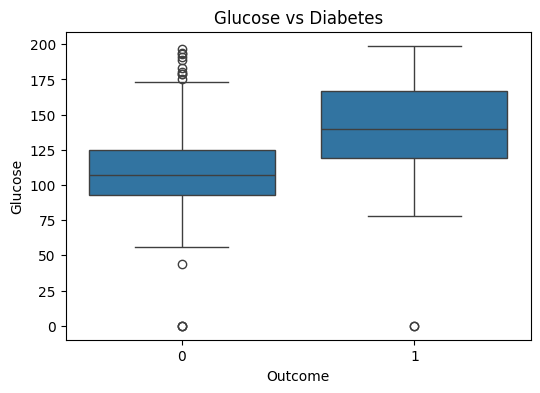

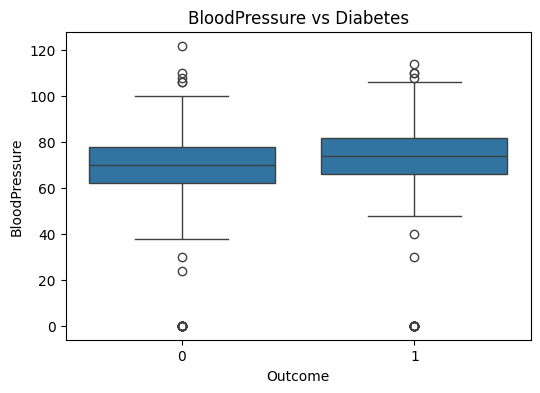

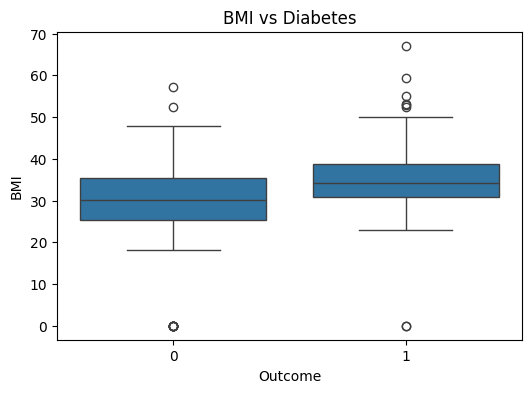

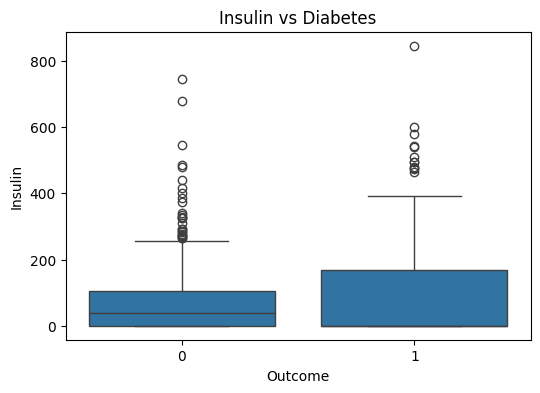

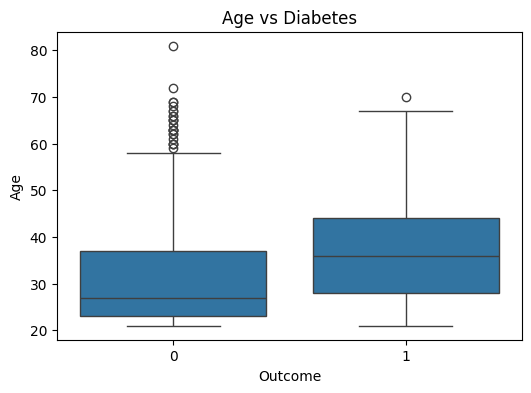

In [93]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'Age']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Diabetes')
    plt.show()


/var/folders/f6/nmbqlry94lz57zhy760mwcr00000gn/T/ipykernel_37469/2662688596.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Age', data=df, palette='pastel')


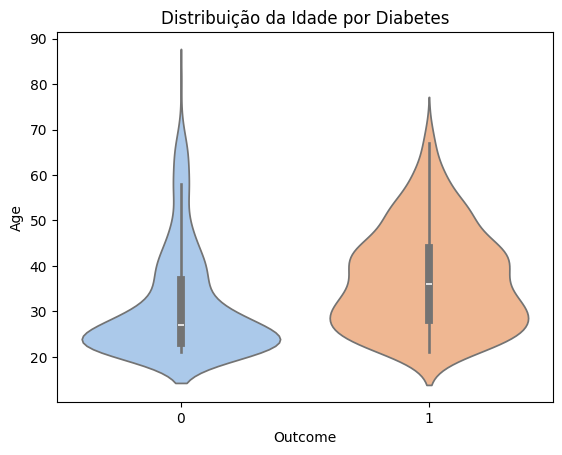

In [94]:
sns.violinplot(x='Outcome', y='Age', data=df, palette='pastel')
plt.title('Distribuição da Idade por Diabetes')
plt.show()

#Revela como pacientes mais velhos têm mais chance de ter diabetes, mas com sobreposição significativa.

In [95]:
df_dados = df.copy()

# Transformando as variavveis object

lb = LabelEncoder()

for variavel in ['Outcome']:
    df_dados[variavel] = lb.fit_transform(df_dados[variavel])

df_dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


/var/folders/f6/nmbqlry94lz57zhy760mwcr00000gn/T/ipykernel_37469/508952990.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


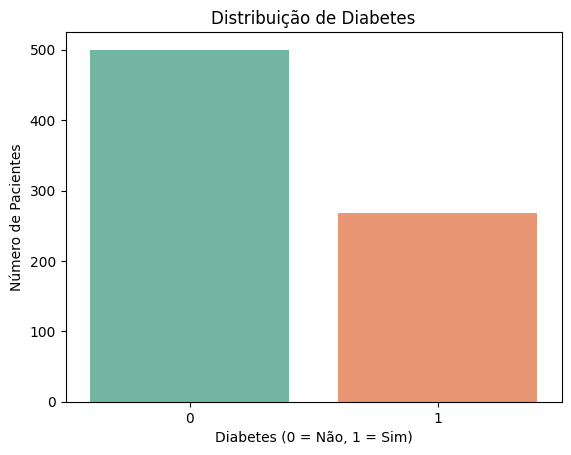

In [96]:
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribuição de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pacientes')
plt.show()
#Mostra se os dados estão balanceados

In [97]:
df_dados.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


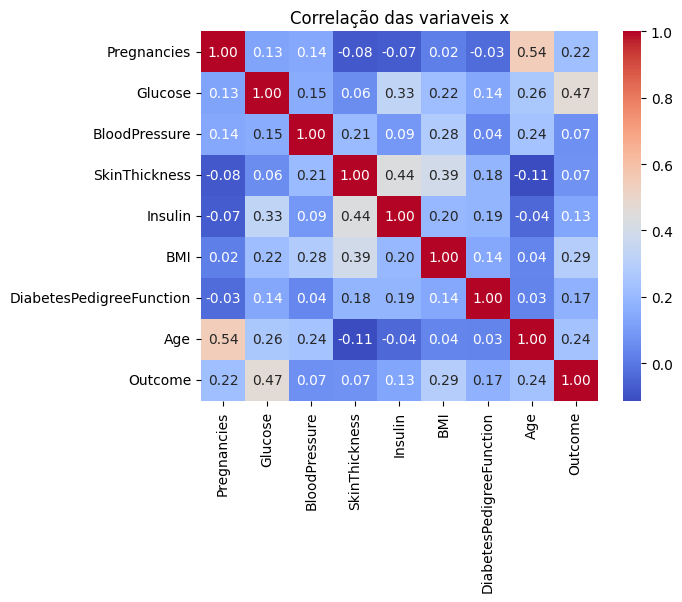

In [98]:
sns.heatmap(df_dados.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação das variaveis x')
plt.show()

In [99]:
correlacao_com_alvo = df_dados.corr(numeric_only=True)['Outcome'].sort_values(ascending=False)

display(correlacao_com_alvo)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Preparando os dados para o treinamento
 Devemos separar os dados preditivos da variavel alvo
 
 Tambem separarmos 70% dos dados e 30% para validação

In [100]:
# Separando preditoras do target

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

target = 'Outcome'

In [101]:
# Dividir entre features (X) e target (y)
X = df[features]
y = df[target]

In [102]:
#tratar valores 0 como ausentes
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
X[cols_with_zeros] = X[cols_with_zeros].replace(0, pd.NA)

/var/folders/f6/nmbqlry94lz57zhy760mwcr00000gn/T/ipykernel_37469/2066059263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_with_zeros] = X[cols_with_zeros].replace(0, pd.NA)


In [103]:
X = X.fillna(X.mean())

/var/folders/f6/nmbqlry94lz57zhy760mwcr00000gn/T/ipykernel_37469/44732401.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(X.mean())


In [104]:
# Separando dados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [106]:
modelo = LogisticRegression()
modelo.fit(X_train_scaled, y_train)


LogisticRegression()

In [107]:
y_pred = modelo.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [108]:
# Conteudo embutido pronto para uso!

with open('modelo_diabetes.pkl', 'wb') as file:
    pickle.dump(modelo, file )